# Proyek Analisis Data: BIKE SHARING DATASET
- **Nama:** Aldi Rohmat Akbar
- **Email:** aldirohmatakbar@gmail.com
- **ID Dicoding:** akbaraldyya

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penggunaan sepeda?
- Pertanyaan 2: Apakah ada pola musiman dalam penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset bike-sharing harian berisi 731 entri, sedangkan dataset per jam berisi 17.379 entri.
- Data mencakup informasi waktu, cuaca, suhu, kelembaban, serta jumlah pengguna kasual dan terdaftar

### Assessing Data

Data Hari

In [7]:
#Cek data kosong
print("Jumlah data missing value:")
print(day_data.isnull().sum())

Jumlah data missing value:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
#Cek data duplikat
print("Jumlah data duplikat:")
print(day_data.duplicated().sum())

Jumlah data duplikat:
0


In [9]:
#cek nilai data yang invalid
invalid_values = {
    'temp': ((day_data['temp'] < 0) | (day_data['temp'] > 1)).sum(),
    'atemp': ((day_data['atemp'] < 0) | (day_data['atemp'] > 1)).sum(),
    'hum': ((day_data['hum'] < 0) | (day_data['hum'] > 1)).sum(),
    'windspeed': ((day_data['windspeed'] < 0) | (day_data['windspeed'] > 1)).sum()
}
print("\nJumlah nilai yang invalid:")
print(invalid_values)


Jumlah nilai yang invalid:
{'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0}


In [10]:
#Cek tipe data
print(day_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [11]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data Jam

In [12]:
#Cek data yang Missing
print("Jumlah data missing value:")
print(hour_data.isnull().sum())

Jumlah data missing value:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
#Cek data duplikat
print("Jumlah data duplikat:")
print(hour_data.duplicated().sum())

Jumlah data duplikat:
0


In [14]:
#cek nilai data yang invalid
invalid_values = {
    'temp': ((hour_data['temp'] < 0) | (hour_data['temp'] > 1)).sum(),
    'atemp': ((hour_data['atemp'] < 0) | (hour_data['atemp'] > 1)).sum(),
    'hum': ((hour_data['hum'] < 0) | (hour_data['hum'] > 1)).sum(),
    'windspeed': ((hour_data['windspeed'] < 0) | (hour_data['windspeed'] > 1)).sum()
}
print("\nJumlah nilai yang invalid:")
print(invalid_values)


Jumlah nilai yang invalid:
{'temp': 0, 'atemp': 0, 'hum': 0, 'windspeed': 0}


In [15]:
#Cek tipe data
print(day_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [16]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Datanya lengkap tidak ada yang hilang
- Data valid dan tidak ada yangduplikat
- Terdapat tipe data yang berbeda yaitu dteday sebagai object. tipe data kolom dteday diubah menjadi tipe data datetime untuk memungkinkan analisis berbasis waktu yang lebih mudah

### Cleaning Data

In [17]:
#Data Hari
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
#Data Jam
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada kolom dteday telah berhasil diubah menjadi tipe datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
seasonal_usage = day_data.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})
print(seasonal_usage)

         cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261


In [23]:
hour_data['hourly_usage'] = hour_data['cnt']

In [24]:
hourly_weather = hour_data.groupby(by=['weathersit', 'hr']).agg({
    'hourly_usage': 'sum'
}).reset_index()
print(hourly_weather)

    weathersit  hr  hourly_usage
0            1   0         28930
1            1   1         16854
2            1   2         10907
3            1   3          5458
4            1   4          2931
..         ...  ..           ...
70           3  22          3869
71           3  23          3308
72           4   1            23
73           4  16            36
74           4  18           164

[75 rows x 3 columns]


In [29]:
weather_corr = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Display the correlation matrix
print("Correlation matrix between weather factors and bike usage:")
print(weather_corr)

Correlation matrix between weather factors and bike usage:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


In [25]:
day_data.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [26]:
grouped_data = day_data.groupby(by='cnt').agg({
    'temp': ['mean', 'max', 'min'],
    'hum': ['mean', 'max', 'min'],
    'windspeed': ['mean', 'max', 'min']
})
grouped_data

temp                           hum                     windspeed  \
          mean       max       min      mean       max       min      mean   
cnt                                                                          
22    0.440000  0.440000  0.440000  0.880000  0.880000  0.880000  0.358200   
431   0.195000  0.195000  0.195000  0.687500  0.687500  0.687500  0.113837   
441   0.243333  0.243333  0.243333  0.823333  0.823333  0.823333  0.316546   
506   0.217500  0.217500  0.217500  0.862500  0.862500  0.862500  0.293850   
605   0.376522  0.376522  0.376522  0.948261  0.948261  0.948261  0.343287   
...        ...       ...       ...       ...       ...       ...       ...   
8294  0.600000  0.600000  0.600000  0.456250  0.456250  0.456250  0.083975   
8362  0.601667  0.601667  0.601667  0.694167  0.694167  0.694167  0.116300   
8395  0.650000  0.650000  0.650000  0.646667  0.646667  0.646667  0.283583   
8555  0.542500  0.542500  0.542500  0.542917  0.542917  0.542917  0.227604   
8714  0.608333  0.608333  0.608333  0.501667  0.501667  0.501667  0.247521   

                          
           max       min  
cnt                       
22    0.358200  0.358200  
431   0.113837  0.113837  
441   0.316546  0.316546  
506   0.293850  0.293850  
605   0.343287  0.343287  
...        ...       ...  
8294  0.083975  0.083975  
8362  0.116300  0.116300  
8395  0.283583  0.283583  
8555  0.227604  0.227604  
8714  0.247521  0.247521  

[696 rows x 9 columns]

In [28]:
numeric_columns = ['temp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_data[numeric_columns].corr()

correlation_matrix[['cnt', 'temp', 'hum', 'windspeed']]

hum_corr = correlation_matrix.loc['hum', 'cnt']
temp_corr = correlation_matrix.loc['temp', 'cnt']
windspeed_corr = correlation_matrix.loc['windspeed', 'cnt']

optimal_conditions = day_data[['temp', 'hum', 'windspeed']].loc[day_data['cnt'].idxmax()]

optimal_conditions

,623
temp,0.608333
hum,0.501667
windspeed,0.247521


In [40]:
weather_distribution = day_data['weathersit'].value_counts().sort_index()
# Menampilkan distribusi data weathersit
print("Distribusi Kondisi Cuaca:")
print(weather_distribution)

Distribusi Kondisi Cuaca:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


In [ ]:
weather_group = day_data.groupby('weathersit')['cnt'].mean().reset_index()
season_group = day_data.groupby('season')['cnt'].mean().reset_index()

In [41]:
print("\nRata-rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca:")
print(weather_group)


Rata-rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


**Insight:**
- suhu (`temp`) memiliki korelasi positif yang signifikan sebesar 0.63 terhadap penggunaan sepeda, sehingga semakin tinggi suhu, semakin banyak pengguna sepeda, sedangkan kelembaban (`hum`) menunjukkan korelasi negatif lemah sebesar -0.10, artinya kelembaban yang tinggi sedikit menurunkan jumlah pengguna sepeda, dan kecepatan angin (`windspeed`) memiliki korelasi negatif yang lebih kuat sebesar -0.23, menunjukkan bahwa angin kencang cenderung mengurangi jumlah pengguna sepeda lebih signifikan dibanding kelembaban.
---
- Rata-rata penggunaan sepeda lebih rendah pada hari-hari mendung dan hujan (nilai weathersit 2 dan 3), dibandingkan dengan hari-hari yang cerah. Hal ini menunjukkan bahwa cuaca buruk berpengaruh besar terhadap pengurangan jumlah pengguna sepeda.
- Distribusi penggunaan sepeda lebih tinggi pada bulan-bulan dengan suhu moderat hingga tinggi. Pada musim dingin, jumlah penggunaan sepeda menurun signifikan, dengan suhu rendah dan cuaca yang kurang mendukung menjadi faktor utama.
- Penggunaan sepeda memperlihatkan pola musiman yang jelas. Musim semi dan musim panas menunjukkan jumlah penggunaan sepeda yang lebih tinggi, sementara penggunaan sepeda menurun pada musim dingin.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

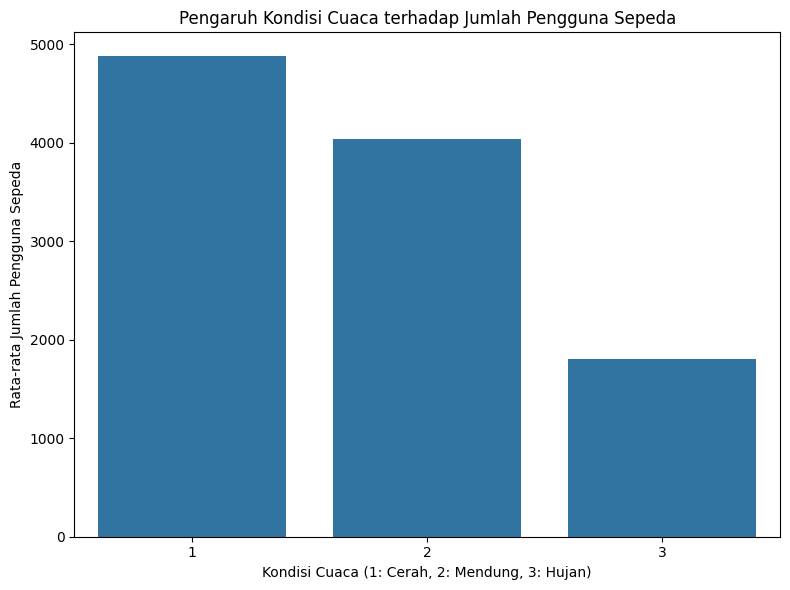

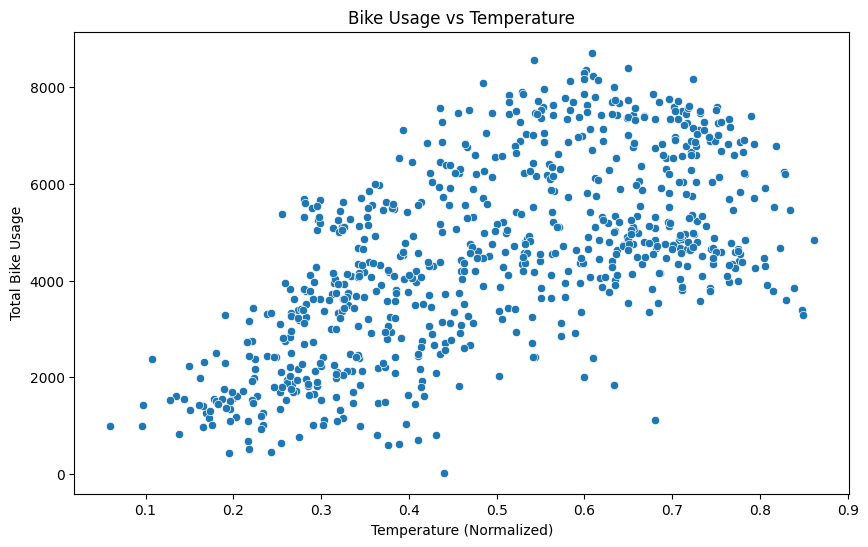

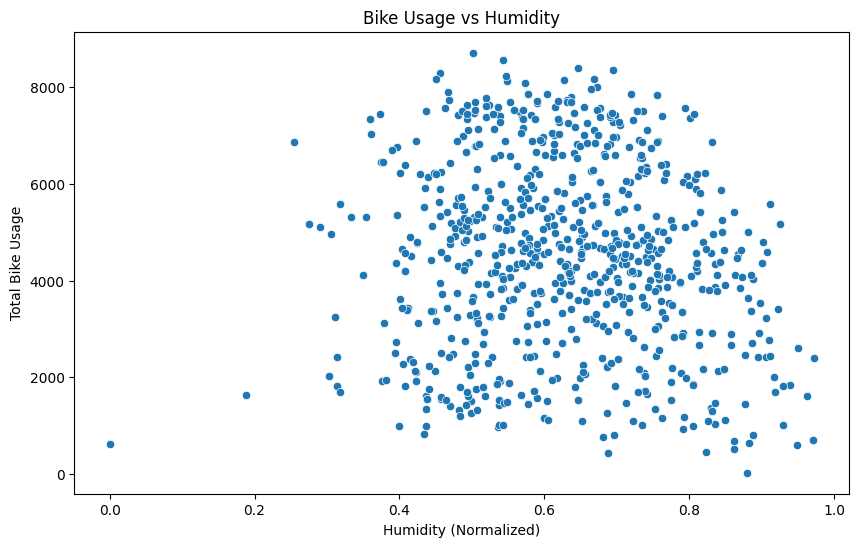

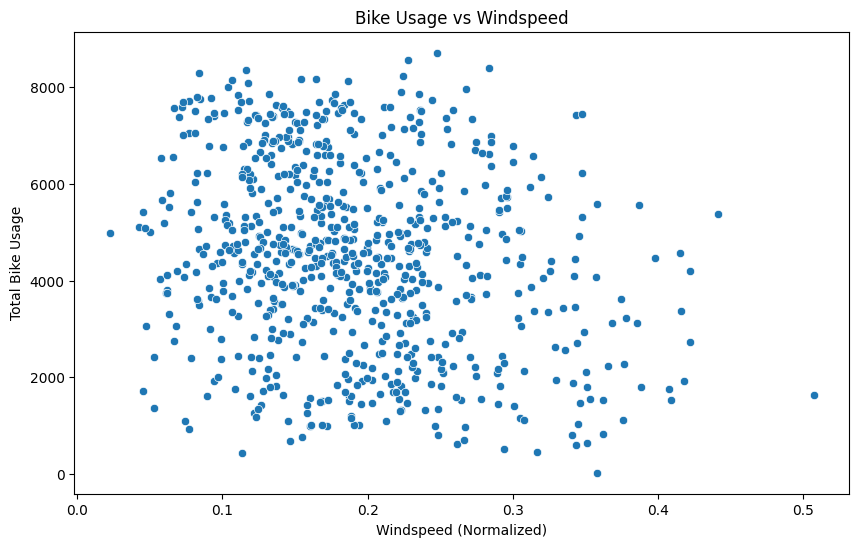

In [45]:
# Visualisasi Rata-rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.tight_layout()
plt.show()

# Scatterplot: Temperature vs Bike Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Bike Usage vs Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Bike Usage')
plt.show()

# Scatterplot: Humidity vs Bike Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_data)
plt.title('Bike Usage vs Humidity')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Total Bike Usage')
plt.show()

# Scatterplot: Windspeed vs Bike Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=day_data)
plt.title('Bike Usage vs Windspeed')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Total Bike Usage')
plt.show()


**Insight:**
- Pada hari-hari dengan cuaca cerah (nilai weathersit = 1), rata-rata jumlah pengguna sepeda mencapai hampir 5000 pengguna per hari. Sementara itu, pada hari mendung (nilai weathersit = 2), jumlah pengguna menurun menjadi sekitar 4000 pengguna, dan pada hari hujan (nilai weathersit = 3), jumlah pengguna turun drastis menjadi sekitar 2000 pengguna. Ini menunjukkan bahwa cuaca buruk seperti hujan atau mendung secara signifikan mengurangi jumlah pengguna sepeda
---
- Scatterplot menunjukkan hubungan yang positif antara suhu (temp) dan jumlah pengguna sepeda (cnt). Semakin tinggi suhu, semakin banyak pengguna sepeda. Puncak penggunaan sepeda terlihat pada suhu sekitar 0.6 hingga 0.7 (dalam skala normalisasi). Hal ini menunjukkan bahwa suhu hangat meningkatkan aktivitas bersepeda.
- Visualisasi hubungan antara kelembaban (hum) dan penggunaan sepeda menunjukkan penyebaran data yang luas dan hubungan yang lebih lemah. Penggunaan sepeda cenderung lebih rendah pada kelembaban tinggi, tetapi pengaruhnya tidak sebesar suhu atau cuaca secara umum. Kelembaban tinggi sedikit menurunkan jumlah pengguna sepeda.
- Scatterplot untuk kecepatan angin (windspeed) menunjukkan bahwa angin kencang berhubungan dengan penurunan jumlah pengguna sepeda. Namun, efeknya lebih tersebar dibandingkan suhu. Pada kecepatan angin yang tinggi (> 0.3), jumlah pengguna sepeda cenderung menurun, tetapi ada variabilitas yang signifikan di berbagai tingkat angin.


### Pertanyaan 2:

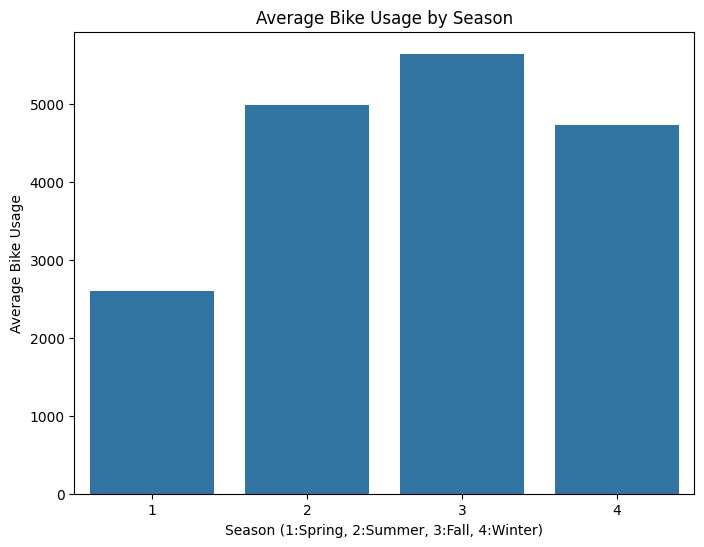

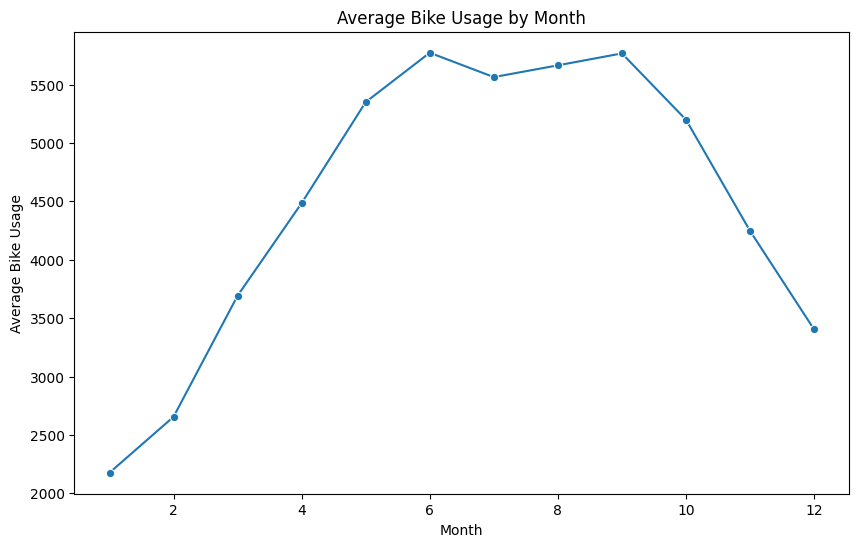

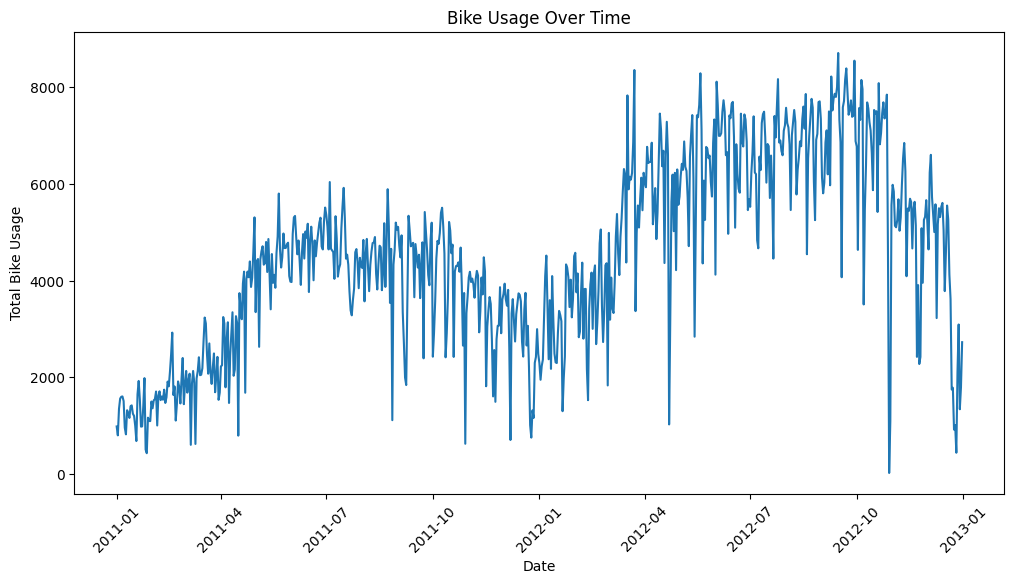

In [30]:
# Visualizing seasonal patterns in bike usage

# Group by season and calculate the mean bike usage
seasonal_usage = day_data.groupby('season')['cnt'].mean().reset_index()

# Barplot for bike usage by season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=seasonal_usage)
plt.title('Average Bike Usage by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Average Bike Usage')
plt.show()

# Group by month to analyze the monthly usage pattern
monthly_usage = day_data.groupby('mnth')['cnt'].mean().reset_index()

# Lineplot for monthly bike usage
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_usage, marker='o')
plt.title('Average Bike Usage by Month')
plt.xlabel('Month')
plt.ylabel('Average Bike Usage')
plt.show()

# Time series plot to see bike usage trends over the year
plt.figure(figsize=(12, 6))
plt.plot(day_data['dteday'], day_data['cnt'], label='Bike Usage')
plt.title('Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Usage')
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Penggunaan sepeda menunjukkan pola musiman yang jelas, di mana **musim panas dan musim gugur** adalah periode dengan penggunaan sepeda tertinggi, sedangkan **musim dingin** mengalami penurunan signifikan. Rata-rata penggunaan sepeda meningkat secara bertahap dari **Februari hingga Agustus**, dengan puncaknya terjadi pada bulan **Juni hingga Agustus**, dan mulai menurun kembali hingga mencapai titik terendah di **Desember**. Grafik time series juga menunjukkan pola tahunan yang berulang, di mana penggunaan sepeda mencapai puncak di musim panas dan turun tajam selama musim dingin, menunjukkan bahwa **cuaca hangat lebih mendukung aktivitas bersepeda**, sementara suhu dingin dan cuaca buruk mengurangi jumlah pengguna sepeda secara signifikan.
---
- Grafik grafik ini memberikan gambaran bahwa tren musiman berulang setiap tahun, dengan penggunaan sepeda yang meningkat pada bulan-bulan yang lebih hangat (musim semi hingga musim panas) dan menurun saat memasuki bulan-bulan yang lebih dingin. Fluktuasi tajam di grafik juga menunjukkan adanya kemungkinan cuaca buruk atau kondisi spesifik yang menyebabkan penurunan penggunaan sepeda secara tiba-tiba pada hari-hari tertentu.

## Analisis Lanjutan (Opsional)

In [44]:
# Defining conditions for four clusters: Extreme, Moderate, Cold, and Windy
def cluster_conditions(row):
    if row['temp'] > 0.7 and row['hum'] < 0.3 and row['windspeed'] < 0.2:
        return 'Extreme'  # Kondisi cuaca ekstrem: suhu tinggi, kelembaban rendah, angin ringan
    elif 0.4 <= row['temp'] <= 0.7 and 0.3 <= row['hum'] <= 0.7 and 0.2 <= row['windspeed'] <= 0.5:
        return 'Moderate'  # Kondisi moderat: cuaca sedang
    elif row['temp'] < 0.4 and row['hum'] > 0.7 and row['windspeed'] > 0.5:
        return 'Cold'  # Cuaca dingin dengan kelembaban tinggi dan angin kencang
    elif row['windspeed'] > 0.5:  # Menambahkan kondisi baru untuk cuaca berangin
        return 'Windy'
    else:
        return 'Other'  # Kondisi yang tidak cocok dengan salah satu aturan

# Apply the clustering rule to create a new column for weather cluster
day_data['weather_cluster'] = day_data.apply(cluster_conditions, axis=1)

# Let's calculate the average usage for both casual and registered users in each cluster
cluster_usage_stats = day_data.groupby('weather_cluster').agg({
    'casual': ['mean', 'min', 'max', 'count'],
    'registered': ['mean', 'min', 'max', 'count'],
    'cnt': ['mean', 'min', 'max', 'count']
})

# Displaying the usage statistics for each cluster
print(cluster_usage_stats)


                      casual                    registered                    \
                        mean  min   max count         mean   min   max count   
weather_cluster                                                                
Moderate         1127.250000  167  3283    88  4342.068182  1628  6946    88   
Other             810.415888    2  3410   642  3566.132399    20  6917   642   
Windy             532.000000  532   532     1  1103.000000  1103  1103     1   

                         cnt                    
                        mean   min   max count  
weather_cluster                                 
Moderate         5469.318182  1795  8714    88  
Other            4376.548287    22  8362   642  
Windy            1635.000000  1635  1635     1  


**Insight:**
- Berdasarkan hasil clustering, cluster Moderate memiliki rata-rata penggunaan sepeda total (cnt) tertinggi, yaitu 5469 pengguna, dengan 88 hari yang termasuk dalam kategori ini, di mana rata-rata pengguna kasual adalah 1127 pengguna, dengan variasi antara 167 hingga 3283 pengguna, dan rata-rata pengguna terdaftar mencapai 4342 pengguna, dengan rentang dari 1628 hingga 6946 pengguna; di sisi lain, cluster Other (yang mencakup kondisi di luar moderat dan berangin) memiliki rata-rata penggunaan sepeda sebesar 4376 pengguna, dengan jumlah hari terbanyak sebanyak 642 hari, di mana pengguna kasual rata-rata mencapai 810 pengguna dengan variasi antara 22 hingga 3410 pengguna, dan pengguna terdaftar rata-rata berjumlah 3566 pengguna, dengan rentang dari 20 hingga 6917 pengguna; sedangkan cluster Windy menunjukkan rata-rata penggunaan sepeda terendah, yaitu 1635 pengguna, dengan hanya 1 hari yang masuk dalam kategori ini, di mana pengguna kasual tercatat sebanyak 532 pengguna dan pengguna terdaftar sebanyak 1103 pengguna, menunjukkan bahwa kondisi cuaca berangin cenderung menurunkan penggunaan sepeda secara signifikan dibandingkan cluster lainnya

## Conclusion

- Conclution pertanyaan 1: Cuaca memiliki pengaruh yang signifikan terhadap penggunaan sepeda. Hari cerah dan suhu yang lebih hangat (sekitar 0.6-0.7 dalam skala normalisasi) mendorong lebih banyak orang untuk menggunakan sepeda, dengan rata-rata penggunaan mencapai hampir 5000 pengguna per hari pada kondisi cerah. Sebaliknya, cuaca buruk seperti mendung atau hujan mengurangi jumlah pengguna sepeda secara signifikan, dengan hari hujan rata-rata hanya menarik sekitar 2000 pengguna. Kelembaban tinggi dan kecepatan angin yang tinggi juga cenderung menurunkan penggunaan sepeda, meskipun pengaruhnya tidak sebesar suhu atau kondisi cuaca secara umum.


---


- Conclution pertanyaan 2: Terdapat pola musiman yang jelas dalam penggunaan sepeda. Penggunaan sepeda mencapai puncaknya selama musim panas dan musim gugur, ketika cuaca cenderung lebih hangat dan nyaman. Sebaliknya, penggunaan sepeda menurun drastis selama musim dingin, ketika suhu lebih rendah dan cuaca cenderung kurang mendukung untuk bersepeda. Pola tahunan ini konsisten, dengan puncak aktivitas bersepeda terjadi antara Juni hingga Agustus, sementara Desember hingga Februari menjadi periode dengan penggunaan sepeda terendah.